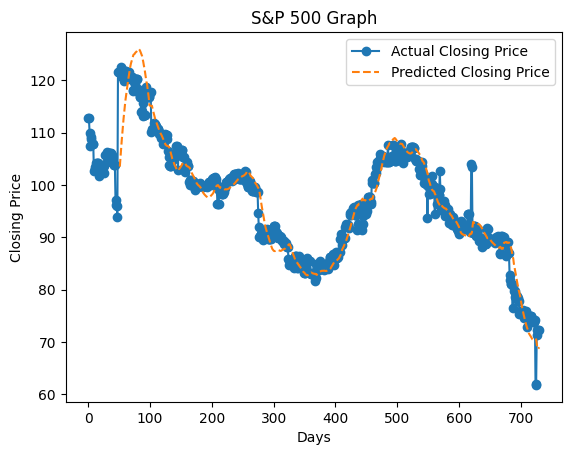

R squared score: 0.9232063539260095
Mean Scored Error: 9.162082118040802


In [11]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

def findCoefficientA(x, y):
    x = np.array(x)
    y = np.array(y)

    # performs operations on numerator and denominator of coefficient
    crossN = np.sum(x*y)-np.size(x)*np.mean(x)*np.mean(y)
    crossD = np.sum(x*x)-np.size(x)*np.mean(x)*np.mean(x)

    a = crossN/crossD
    return a

def findCoefficientB(x, y, a):
    x = np.array(x)
    y = np.array(y)

    # performs operations on y-intercept
    b = np.mean(y) - a*np.mean(x)
    return b

# gets the data
ds = pd.read_csv("../../Datasets/sandp500.csv")

# sorts the data
ds['Date'] = pd.to_datetime(ds['Date'])
ds = ds.sort_values(by = 'Date')

# gets all the dates to be displayed on the graph
dates = []
i = 0
for val in ds['Date']:
    dates.append(i)
    i=i+1

# gets all the prices to be displayed on the graph
prices = []
for val in ds['Close']:
    prices.append(val)

# gets all prices after the first 50
rPrices = []
for k, val in enumerate(ds['Close']):
    if k < 50:
        continue
    rPrices.append(val)

x = []
y = []
i = 0
# gets the first 50 prices and dates
for val in ds['Close']:
    if i >= 50:
        break
    x.append(i)
    y.append(val)
    i=i+1

xTemp = []
yTemp = []
for i, val in enumerate(ds['Close']):
    # skips the first 50 prices
    if i < 50:
        continue

    # finds the coefficients
    a = findCoefficientA(x,y)
    b = findCoefficientB(x,y,a)

    # predicts prices for next day
    xTemp.append(i+1)
    yTemp.append(b+a*(i+1))

    # adds values from the data
    x.append(i)
    y.append(val)

    # removes values from the arrays
    x.pop(0)
    y.pop(0)
    
a = findCoefficientA(x,y)
b = findCoefficientB(x,y,a)

xx = np.array(xTemp)
yy = np.array(yTemp)

# plots graph for all data
plt.plot(dates, prices, label='Actual Closing Price', marker='o')

# plots prediction graph
plt.plot(xx, yy, label='Predicted Closing Price', linestyle='--')

plt.title("S&P 500 Graph")
plt.xlabel("Days")
plt.ylabel("Closing Price")
plt.legend()

plt.show()

# checks how strong the correlation is between the graphs
r2 = r2_score(rPrices, yy)
print("R squared score: " + str(r2))
mve = mean_squared_error(rPrices, yy)
print("Mean Scored Error: " + str(mve))